In [1]:
import pandas as pd
import numpy as np


In [3]:
url="https://raw.githubusercontent.com/DataScience75/batch89/main/german_credit_data.csv"
data=pd.read_csv(url)

In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
## clustering always works on numerical data

In [9]:
 data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
cluster_data=data[['Age','Credit amount', 'Duration']]

In [11]:
cluster_data.head(2)

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [35]:
### Randomly choosing 3 clusters   means 3 groups

In [36]:
km= KMeans(n_clusters=4)

In [37]:
kmean=km.fit(cluster_data)

C:\Users\parit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
pred=kmean.predict(cluster_data)
pred

array([2, 3, 2, 3, 1, 3, 1, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 3, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2,
       2, 2, 3, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3,
       1, 2, 0, 2, 3, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 3,
       1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 0, 3, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 3, 2, 3, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0,
       1, 3, 2, 2, 2, 3, 3, 1, 3, 0, 1, 2, 2, 1, 2,

In [39]:
 ## to select optimum cluster we use elbow method (wcss)

C:\Users\parit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

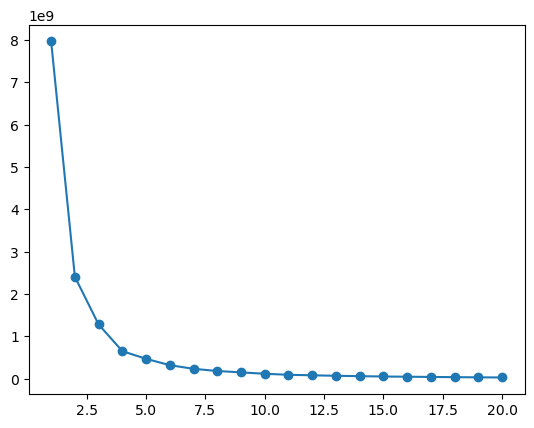

In [49]:
import matplotlib.pyplot as plt
inertias=[]

for c in range(1,21):
    km=KMeans(n_clusters=c,random_state=0)
    kmean=km.fit(cluster_data)
    inertias.append(kmean.inertia_)

plt.figure()
plt.plot(range(1,21),inertias,marker="o")
plt.show()

In [41]:
## elbow will break on 4 so we select 4 as an optimum cluster

In [43]:
cluster_data["cluster"]=pred
cluster_data.head()

C:\Users\parit\AppData\Local\Temp\ipykernel_30308\626388810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data["cluster"]=pred


,Age,Credit amount,Duration,cluster
0,67,1169,6,2
1,22,5951,48,3
2,49,2096,12,2
3,45,7882,42,3
4,53,4870,24,1


In [44]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Credit amount'>

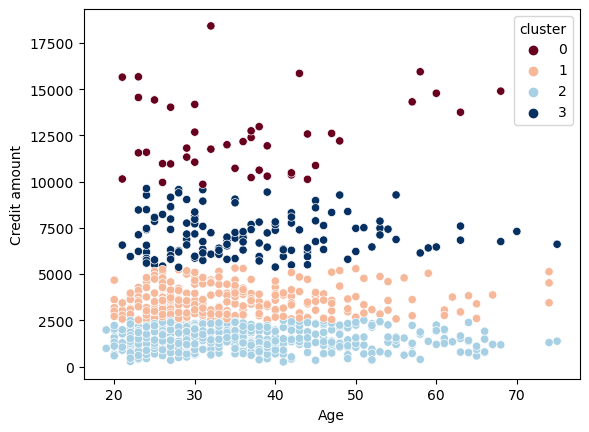

In [45]:
sns.scatterplot(x="Age",y="Credit amount",hue="cluster",data=cluster_data,palette="RdBu")

<Axes: xlabel='Age', ylabel='Duration'>

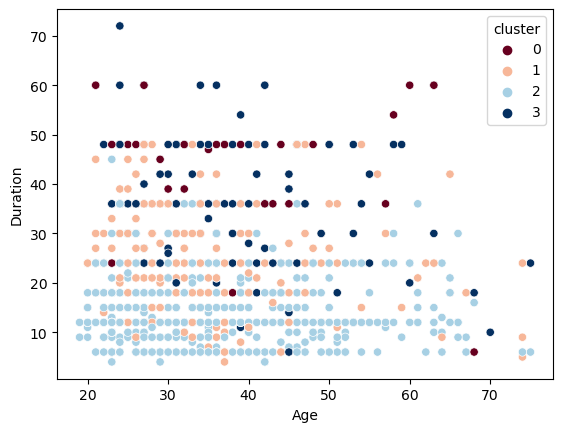

In [46]:
sns.scatterplot(x="Age",y="Duration",hue="cluster",data=cluster_data,palette="RdBu")

<Axes: xlabel='Duration', ylabel='Credit amount'>

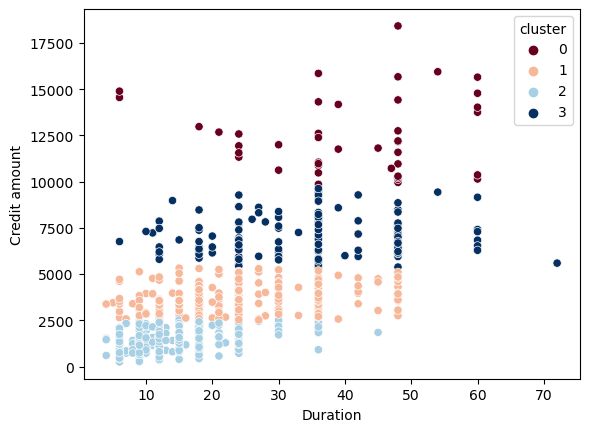

In [47]:
sns.scatterplot(x="Duration",y="Credit amount",hue="cluster",data=cluster_data,palette="RdBu")